In [3]:
#1) Calculate the total purchase amount per customer. Identify top 3 purchaces

import pandas as pd


In [3]:
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}

In [6]:
df = pd.DataFrame(data)
df

,Customer_ID,Purchase_Amount
0,101,200
1,102,150
2,103,180
3,101,220
4,104,300
5,102,200
6,101,100
7,105,400
8,102,250
9,103,300


In [18]:
total_purchases = df.groupby('Customer_ID', as_index=False)['Purchase_Amount'].sum()
print("Total Purchases per Customer:\n")
print(total_purchases)

Total Purchases per Customer:

   Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400


In [28]:
top_customers = total_purchases.sort_values(by='Purchase_Amount', ascending=False).head(3)
print("\nTop 3 Frequent Customers :\n")
print(top_customers.reset_index(drop=True))


Top 3 Frequent Customers :

   Customer_ID  Purchase_Amount
0          102              600
1          101              520
2          103              480


In [11]:
# 2  Linear Regression
from sklearn.linear_model import LinearRegression


In [1]:
dataset = {'Square_Feet': [1500, 2000, 2500, 3000, 3500],
        'Price': [300000, 400000, 500000, 600000, 700000]}

In [4]:
ds =  pd.DataFrame(dataset)


In [6]:
ds

,Square_Feet,Price
0,1500,300000
1,2000,400000
2,2500,500000
3,3000,600000
4,3500,700000


In [125]:
from sklearn.model_selection import train_test_split
independent = ds[["Square_Feet"]]
dependent = ds[["Price"]]
x_train,x_test,y_train,y_test = train_test_split(independent,dependent, test_size=0.4,random_state=0)

x_train,x_test,y_train,y_test

(   Square_Feet
 1         2000
 3         3000
 4         3500,
    Square_Feet
 2         2500
 0         1500,
     Price
 1  400000
 3  600000
 4  700000,
     Price
 2  500000
 0  300000)

In [126]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [127]:
y_pred = regressor.predict(x_test)

In [62]:
y_pred

array([[500000.],
       [300000.]])

In [128]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)

In [64]:
r_score

1.0

In [129]:
test_data = [[1800], [2800]]

In [130]:
result=regressor.predict(test_data)
result
print("Predicted Price:\n",result)

Predicted Price:
 [[360000.]
 [560000.]]


C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


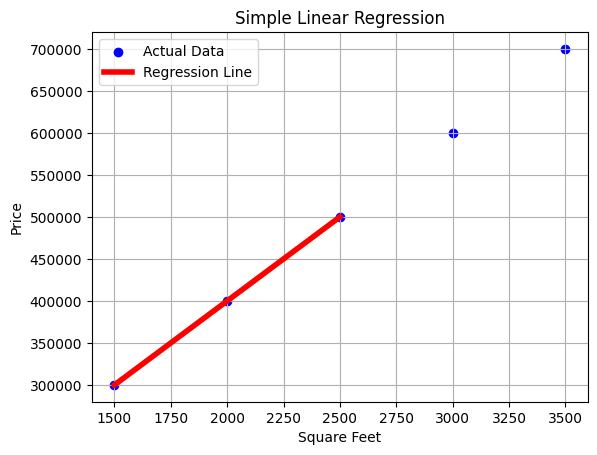

In [140]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(independent, dependent, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=4, label='Regression Line')

# Labels and title
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Group 

In [89]:
df

,Category,Value
0,A,10
1,B,15
2,C,20
3,A,30
4,D,25
5,B,18
6,A,22
7,E,40
8,B,35
9,C,50


In [73]:
df =  pd.DataFrame(data)
group = df.groupby("Category")


In [87]:
print("The total occurance per category:\n" , group[['Value']].count())

The total occurance per category:
           Value
Category       
A             4
B             3
C             3
D             1
E             1


In [90]:
print("The frequent 3 occurance per category:\n" , group[['Value']].count().head(3))

The frequent 3 occurance per category:
           Value
Category       
A             4
B             3
C             3


In [117]:
# 4  missing Values 
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 30, None, 35, None]}

In [118]:
df = pd.DataFrame(data)

In [119]:
#df
print("Original_Data is \n:",df)

Original_Data is 
:       Name   Age
0    Alice  25.0
1      Bob  30.0
2  Charlie   NaN
3    David  35.0
4      Eve   NaN


In [120]:
#original_data['Age'] = original_data['Age'].fillna(original_data['Age'].mean())
# Fill missing ages with mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())
print("The data after Imputation is:\n" ,df)

The data after Imputation is:
       Name   Age
0    Alice  25.0
1      Bob  30.0
2  Charlie  30.0
3    David  35.0
4      Eve  30.0


In [121]:
# 5 Predict the salary for an individual with 6 years of experience.

In [141]:
data = {'Experience': [1, 2, 3, 4, 5], 
        'Salary': [30000, 35000, 40000, 45000, 50000]}

In [142]:
df = pd.DataFrame(data)
df

,Experience,Salary
0,1,30000
1,2,35000
2,3,40000
3,4,45000
4,5,50000


In [167]:
from sklearn.model_selection import train_test_split
independent = df[["Experience"]]
dependent = df[["Salary"]]
x_train,x_test,y_train,y_test = train_test_split(independent,dependent, test_size=0.3,random_state=0)
regressor = LinearRegression()
y_pred = regressor.fit(x_train,y_train)
test_data = [[6]]
result=regressor.predict(test_data)

C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [164]:
print("The salary for 6 years exp is:\n$" , result)

The salary for 6 years exp is:
$ [[55000.]]


In [165]:
y_pred

LinearRegression()

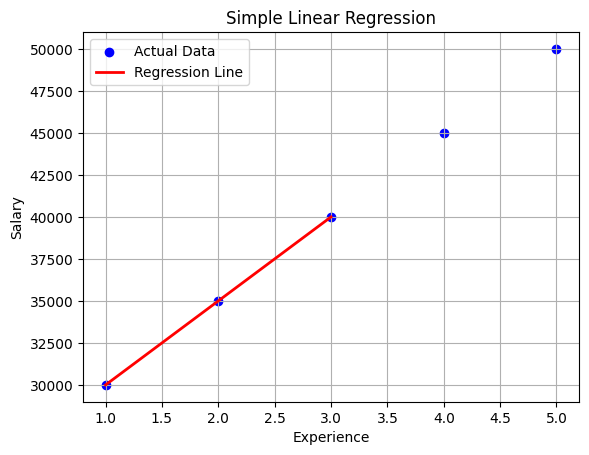

In [173]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(independent, dependent, color='blue', label='Actual Data')
plt.plot(x_test, y_test, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
# predect the email spam
data = pd.DataFrame(
    {'word_count': [100, 150, 200, 120, 180, 220], 
        'is_spam': ['ham', 'spam', 'spam', 'ham', 'spam', 'spam']}
    )
#df = pd.get_dummies(data,drop_first=True)
#df=df.replace({True:1,False:0}) 

In [219]:
data

,word_count,is_spam
0,100,ham
1,150,spam
2,200,spam
3,120,ham
4,180,spam
5,220,spam


In [248]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import LabelEncoder 
#from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['is_spam'])
x = data[["word_count"]]
y = data['label'] 
#x_train,x_test,y_train,y_test = train_test_split(independent,dependent, test_size=0.3,random_state=0)
cls = LR()
y_pred = cls.fit(x,y)
y_pred
test_data = [[200]]
#test_data = [[320]]
result=cls.predict(test_data)
result

C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [249]:
y_pred


LogisticRegression()

In [244]:
data

,word_count,is_spam,label
0,100,ham,0
1,150,spam,1
2,200,spam,1
3,120,ham,0
4,180,spam,1
5,220,spam,1


In [245]:
decoded_prediction = encoder.inverse_transform(result)

In [254]:
print(f"Prediction for email with 200 words: {decoded_prediction[0]}")
print(f"Prediction for email with 200 words: {decoded_prediction[0].capitalize()}")

Prediction for email with 200 words: spam
Prediction for email with 200 words: Spam


C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


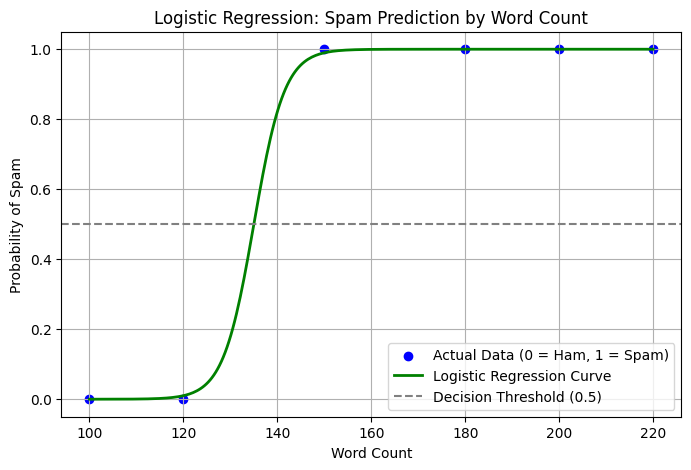

In [262]:
# Generate a range of word counts for plotting
import numpy as np
word_count_range = np.linspace(data['word_count'].min(), data['word_count'].max(), 300).reshape(-1, 1)
probabilities = cls.predict_proba(word_count_range)[:, 1]  # probability of being spam (label=1)

# Plotting
plt.figure(figsize=(8, 5))

# Scatter plot of original data
plt.scatter(data['word_count'], data['label'], color='blue', label='Actual Data (0 = Ham, 1 = Spam)')

# Plot the logistic regression curve
plt.plot(word_count_range, probabilities, color='green', linewidth=2, label='Logistic Regression Curve')

# Decision boundary (optional)
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')

# Labels and legend
plt.xlabel('Word Count')
plt.ylabel('Probability of Spam')
plt.title('Logistic Regression: Spam Prediction by Word Count')
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()
